# Videos and Exercises for Session 2: Data Structuring in Pandas I

In this combined teaching module and exercise set, you will be working with structuring data. 

We will start out with a recap of some basic function and methods that become available in pandas. Then there will be a short intermezzo, where you will be required to think a bit about how to write readible code and make use of the method chaining opportunities that come with python. Then finally, you will get to work with some more advanced data types that are handled natively with pandas. The structure is as follows:
1. Welcome (Back to) Pandas
    - DataFrames and Series
    - Operations with Elementary Data Types in the Context of Pandas
        - Boolean Series
        - String Operations
        - Numeric Operations and Methods
2. Readible Code and Method Chaining
3. More Advanced Data Types
    - Categorical Data
    - Time Series Data
    
**NOTE:** I might be speaking quite slowly in some of the videos. A good advice is to turn up the speed to x1.25 or x1.5 if you want to get through without spending too much time:)

## Packages
Load in the required modules and set up the plotting library:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

Wonder what `%matplotlib inline` does? It's not too important for now. However, if you are interested, you can read more about it [here](https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline).

# Part 1: Welcome (Back to) Pandas

As mentioned during the lecture, data structuring skills are necessary to become a great data scientist. There is no way around it.

Let's start with the basics. In the first video, we start out by talking about the fundamentals of Pandas: 
- The Pandas DataFrame and the Pandas Series. 
- We then proceed and discuss how indices and colums can be named and selected. 
- Finally, we make some simple operations.

**NOTE:** This is mainly repitition of what you already worked with in assignment 0. If you feel comfortable with this, you should proceed to the associated exercises that will get you warmed up for the rest of this notebook.

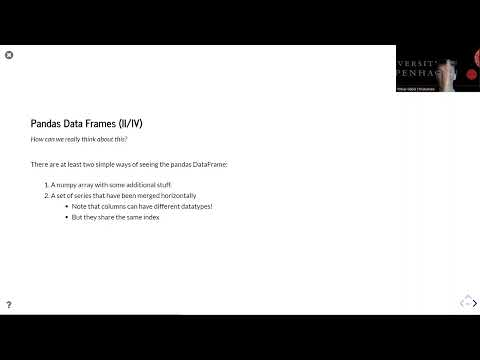

In [2]:
YouTubeVideo('GJ6KAXekvBk', width=640, height=360)

In this set of introductory exercises, we are going to briefly touch upon some of the tools from the video. Again, be aware that there is going to be some repition of the content from assignment 0 here - but these things are all very useful to get under your skin!

> **Ex. 2.1.1**: Run the following two lines below. Explain to yourself what the second line did, and how each entry affected it. In relation to this, what did the first line ensure? When can this be useful? Try and play around with the seed.

In [3]:
np.random.seed(seed=161193)
np_arr=np.round(np.random.exponential(10, size=(10**5,3)),0)

print(np_arr)

[[ 5.  0.  2.]
 [ 4.  7. 20.]
 [ 1.  4.  2.]
 ...
 [ 1. 25.  5.]
 [ 1. 47.  6.]
 [ 4.  1.  3.]]


Now, we want you to investigate how easy it is to go from a numpy `array` to a pandas `DataFrame`. You are going to do something similar to this repeatedly in this course!

> **Ex. 2.1.2**: Create a Pandas DataFrame called `my_df` from `np_arr`:

In [4]:
# YOUR CODE HERE
my_df = pd.DataFrame(np_arr)

my_df


,0,1,2
0,5.0,0.0,2.0
1,4.0,7.0,20.0
2,1.0,4.0,2.0
3,3.0,9.0,4.0
4,5.0,2.0,13.0
...,...,...,...
99995,2.0,7.0,14.0
99996,5.0,3.0,7.0
99997,1.0,25.0,5.0
99998,1.0,47.0,6.0


In [5]:
# inspect value at row 8543, column 2
my_df.iloc[8543,2]

13.0

Before we continue working with this DataFrame, we want to make sure that you are capable of transforming it back to different types of containers. This is another very fundamental tool in your data science toolbox.

> **Ex. 2.1.3**: In the following cell, generate an `array`, a `list` and a `dict` from `my_df` (you should be able to do each of these things in one line). Verify that you did this properly by printing your output. Inspect the dictionary: How do you access the value associated with the column index 2 and row index 8543?

In [6]:
# YOUR CODE HERE

# array
array_from_df = my_df.values
#print(array_from_df)

# list 
list_from_df = my_df.values.tolist()
#print(list_from_df)

# dict 
dict_from_df = my_df.to_dict()
#print(dict_from_df)

In [7]:
# Access the value associated with column index 2 and row index 8543
value_8543_column2_dict = dict_from_df[2][8543]
print("\nValue at row index 8543 and column index 2:", value_8543_column2_dict)


Value at row index 8543 and column index 2: 13.0


A noticeable distiction between pandas dataframes and, say, numpy arrays is the option to label indices and (in particular) columns. This is helpful when working with large sets of data.

> **Ex. 2.1.4**: Going back to the DataFrame `my_df`, we now want you to try the following: 
> 1. Label the columns 'apples', 'bananas' and 'oranges'
> 2. Change the indices to 'cust**x**' where **x** is a sequential numbering of the lines starting from 1 (*hint:* There are many ways to do this, e.g. with a list comprehension!)
> 3. Print the first 10 observations using the `head()` method.

In [8]:
# YOUR CODE HERE

# Task 1: Label the columns as 'apples', 'bananas', and 'oranges'
my_df.columns = ['apples', 'bananas', 'oranges']

# Task 2: Change the indices to 'custx' where x is a sequential numbering starting from 1
my_df.index = ['cust' + str(x) for x in range(1, len(my_df) + 1)]

# Task 3: Print the first 10 observations using the head() method
print(my_df.head(10))

        apples  bananas  oranges
cust1      5.0      0.0      2.0
cust2      4.0      7.0     20.0
cust3      1.0      4.0      2.0
cust4      3.0      9.0      4.0
cust5      5.0      2.0     13.0
cust6      2.0      6.0      0.0
cust7     12.0     16.0     14.0
cust8     30.0      5.0     18.0
cust9     21.0      0.0      2.0
cust10    11.0     14.0      1.0


As we saw in the video, we can basically extract a series from a pandas dataframe by simply selecting one column from the dataframe and storing it as a new object.

> **Ex. 2.1.5**: Now, we want you to select only a single column and inspect the output a bit:
> 1. Select 'apples' and store it as 'apples_ser'. Try using the key-based method and the object-based method, respectively. 
> 2. Check the data type. Thinking about our first lines of code, why is it not an `integer`? Convert the data in both 'apples_ser' and 'my_df' to intergers.

In [9]:
# YOUR CODE HERE

# Task 1: Select 'apples' and store it as 'apples_ser' using both methods

# Using key-based method:
apples_ser = my_df['apples']

# Using object-based method (attribute access):
apples_ser = my_df.apples

# Task 2: Check the data type of 'apples_ser' and convert both 'apples_ser' and 'my_df' to integers

# Checking data type of 'apples_ser'
print("Data type of 'apples_ser':", apples_ser.dtype)

# Convert 'apples_ser' to integer
apples_ser = apples_ser.astype(int)

# Convert 'my_df' to integer
my_df = my_df.astype(int)

# Checking data type after conversion
print("Data type of 'apples_ser' after conversion:", apples_ser.dtype)
print("Data type of 'my_df' after conversion:")
print(my_df.dtypes)


Data type of 'apples_ser': float64
Data type of 'apples_ser' after conversion: int32
Data type of 'my_df' after conversion:
apples     int32
bananas    int32
oranges    int32
dtype: object


## Boolean Series

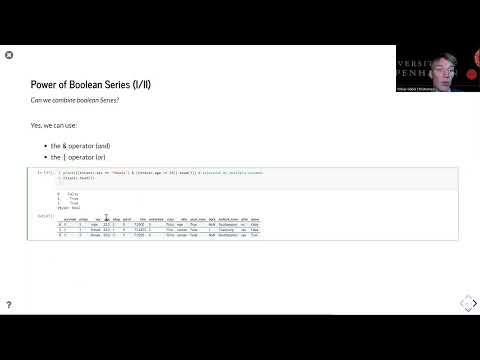

In [10]:
YouTubeVideo('N943L-XFLjU', width=640, height=360)

Boolean 'data' is the simplest data type that we work with. These variables are binary, and basically represent a True or False value. As seen in the video, they become extraordinarily useful when working with pandas series. In particular, boolean series can be applied when we only want to work with certain rows in a dataframe.

> **Ex. 2.1.6**: Drop all rows for which 'Apples' is strictly smaller than 5.

In [11]:
# YOUR CODE HERE

# Drop rows where 'apples' is strictly smaller than 5
my_df = my_df.drop(my_df[my_df['apples'] < 5].index)

# Print the modified DataFrame
print(my_df)

           apples  bananas  oranges
cust1           5        0        2
cust5           5        2       13
cust7          12       16       14
cust8          30        5       18
cust9          21        0        2
...           ...      ...      ...
cust99989       5       31       16
cust99990       9       11        2
cust99991      37       17        2
cust99992       7        3       19
cust99997       5        3        7

[63837 rows x 3 columns]


## Numeric Operications and Methods

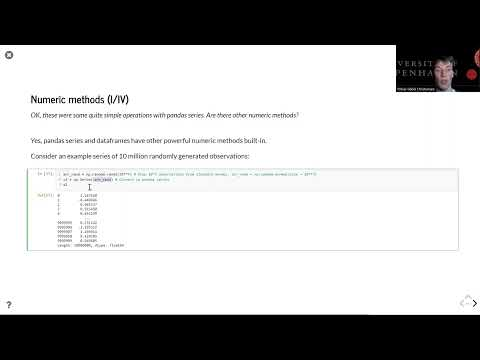

In [12]:
YouTubeVideo('aoCM_s6UObs', width=640, height=360)

As we saw in the video, we can easily make vectorized operations with multiple numpy arrays as well as pandas series and dataframes. This feature can become useful in many cases - in particular, when you have a large set of data and you do not want to make a (computationally exhaustive) loop through all you observation.

> **Ex. 2.1.7**: In this exercise, we want you to make operations on multiple vectors and matrices using a combination of numpy arrays and pandas dataframes.
> 1. Create a numpy array (with 3 elements) of costs associated with different types of fruits. Call this 'price'. Entries should be 1, 4 and 3, respectively.
> 2. Create a new dataframe with information on each costumer's expenses associated with each type of fruit. This should involve multiplying your cost array with the 'my_df'.
> 3. Create a new column called 'Total expenditure' by summing over fruit-specific prices for each customer (*hint:* Learn more about such sum [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)).
> 4. Sort the dataframe by total expenditure, starting with the customer with highest expenditure.

In [13]:
# YOUR CODE HERE

# 1. Create a numpy array (with 3 elements) of costs associated with different types of fruits.
price = np.array([1, 4, 3])

# 2. Create a new dataframe with information on each customer's expenses associated with each type of fruit.
# Multiply 'price' array with 'my_df' to calculate expenses for each customer and fruit combination.
expenses_df = my_df.copy()  # Creating a copy of my_df to avoid modifying the original DataFrame.
expenses_df[['apples', 'bananas', 'oranges']] = expenses_df[['apples', 'bananas', 'oranges']].values * price

# 3. Create a new column called 'Total expenditure' by summing over fruit-specific prices for each customer.
expenses_df['Total expenditure'] = expenses_df[['apples', 'bananas', 'oranges']].sum(axis=1)

# 4. Sort the dataframe by total expenditure, starting with the customer with the highest expenditure.
expenses_df = expenses_df.sort_values(by='Total expenditure', ascending=False)
print(expenses_df)


           apples  bananas  oranges  Total expenditure
cust2459       14      368      180                562
cust12385       9      372      150                531
cust50360      31      300      171                502
cust66559      22      332       93                447
cust36884      44      204      195                443
...           ...      ...      ...                ...
cust45372       5        0        0                  5
cust12524       5        0        0                  5
cust4308        5        0        0                  5
cust70191       5        0        0                  5
cust4190        5        0        0                  5

[63837 rows x 4 columns]


When we have a large data set, it is difficult to get an idea of it's characteristics by simply sorting and printing. In such cases, we much rather want to look at some kinds of descriptive statistics for our data. 

> **Ex. 2.1.8**: In this exercise, we will ask you to use two methods from the video in order to shed some light on the distribution of total expenditure:
> 1. Use `describe()` to get an idea about the distribution of total expenditure in the data set. What does the distance between `mean` and the `50%` quantile tell you about the skewness?
> 2. Use the `cut` method to split the sample into 6 equal sized bins of expenditures from 0 to 600. Find the *share* of observations within each of these bins (we will work more with *categorical data* later in this session).

In [14]:
# YOUR CODE HERE

# 1. Use describe() to get an idea about the distribution of total expenditure in the data set.
total_expenditure_stats = expenses_df['Total expenditure'].describe()
print("Summary statistics for total expenditure:")
print(total_expenditure_stats)

print()

# Calculate the skewness using the mean and 50% quantile
skewness = total_expenditure_stats['mean'] - total_expenditure_stats['50%']
print("\nSkewness (mean - 50% quantile):", skewness)

""" The distance between the mean and the 50% quantile tells us about the skewness of the distribution.
If the mean is greater than the 50% quantile (median), 
it indicates a right-skewed distribution, and if the mean is smaller than the median, 
it indicates a left-skewed distribution.
#A small positive value for skewness means a slightly right-skewed distribution, and a small negative value means a slightly left-skewed distribution.
"""


Summary statistics for total expenditure:
count    63837.000000
mean        83.780519
std         50.621702
min          5.000000
25%         47.000000
50%         73.000000
75%        109.000000
max        562.000000
Name: Total expenditure, dtype: float64


Skewness (mean - 50% quantile): 10.78051913467111


' The distance between the mean and the 50% quantile tells us about the skewness of the distribution.\nIf the mean is greater than the 50% quantile (median), \nit indicates a right-skewed distribution, and if the mean is smaller than the median, \nit indicates a left-skewed distribution.\n#A small positive value for skewness means a slightly right-skewed distribution, and a small negative value means a slightly left-skewed distribution.\n'

In [15]:
# 2. Use the cut method to split the sample into 6 equal-sized bins of expenditures from 0 to 600.
# Find the share of observations within each of these bins.
bins = [0, 100, 200, 300, 400, 500, 600]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600']

# Create a new column 'Expenditure bins' to store the bin labels for each observation
expenses_df['Expenditure bins'] = pd.cut(expenses_df['Total expenditure'], bins=bins, labels=labels)

# Calculate the share of observations within each bin
bin_shares = expenses_df['Expenditure bins'].value_counts(normalize=True)
print("\nShare of observations in each expenditure bin:")
print(bin_shares)

print()

print(expenses_df)


Share of observations in each expenditure bin:
0-100      0.705860
100-200    0.262011
200-300    0.029513
300-400    0.002350
400-500    0.000219
500-600    0.000047
Name: Expenditure bins, dtype: float64

           apples  bananas  oranges  Total expenditure Expenditure bins
cust2459       14      368      180                562          500-600
cust12385       9      372      150                531          500-600
cust50360      31      300      171                502          500-600
cust66559      22      332       93                447          400-500
cust36884      44      204      195                443          400-500
...           ...      ...      ...                ...              ...
cust45372       5        0        0                  5            0-100
cust12524       5        0        0                  5            0-100
cust4308        5        0        0                  5            0-100
cust70191       5        0        0                  5            0-100


## String Operations

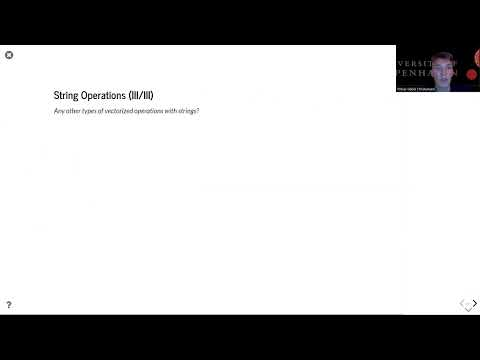

In [16]:
YouTubeVideo('_0AwsOTtouU', width=640, height=360)

Finally, we saw that pandas handles string variable natively. In particular, there is a set of string-specific operations (`.str`) that can be applied to a whole pandas series without having to loop through each row.

> **Ex. 2.1.9**: In this final introductory exercise, we want you to 
> 1. Create a new variable (column) based on the index called 'Customer'. This should capitalize the customer id and write out 'Cust' to 'Customer' (i.e. you should get something similar to 'Customer **x**'). 
> 2. Reset the index.

In [17]:
# YOUR CODE HERE

# 1. Create a new variable (column) based on the index called 'Customer'.
# This should capitalize the customer id and write out 'Cust' to 'Customer'.
expenses_df['Customer'] = 'Customer ' + expenses_df.index.str.replace('cust', '').str.capitalize()

# 2. Reset the index.
expenses_df.reset_index(drop=True, inplace=True)

# Print the modified DataFrame after the transformations
expenses_df

,apples,bananas,oranges,Total expenditure,Expenditure bins,Customer
0,14,368,180,562,500-600,Customer 2459
1,9,372,150,531,500-600,Customer 12385
2,31,300,171,502,500-600,Customer 50360
3,22,332,93,447,400-500,Customer 66559
4,44,204,195,443,400-500,Customer 36884
...,...,...,...,...,...,...
63832,5,0,0,5,0-100,Customer 45372
63833,5,0,0,5,0-100,Customer 12524
63834,5,0,0,5,0-100,Customer 4308
63835,5,0,0,5,0-100,Customer 70191


# Part 2: Readible Code

Before proceeding to part 3 on advanced data types that are handled natively in pandas, we want you to think a bit about writing readable code. In particular, if we have lots of code, it may be very difficult for others or ourselves to read. Therefore, providing some structure and meta text can help reading the code.

In the following, you will learn about readible code. Then we ask you to use what you learned in order to process the NOAA data from assignment 0. Don't spend too long on this exercise - we are going to use the data for the following exercises.

## Commenting

When making code it's good practice to document different parts of the code. In particular describing functions and complex code. The example below shows how to make multi-line comments (as a string, which is not assigned) and in-line comments using the `#` character.

```python
def my_fct(x,y):
    ''' 
    Computes the sum of input values (multi-line comment as string)
    '''
    z = x+y # Here we perform the summation (in-line comment)
    return z
```


## Method chaining

We can write multiple operations together by putting them one after the other, which is known as `method chaining`. Using this, we only need to assign them once to a new object and therefore we save a lot of code. We change the example below into one using a method chain:

Example without method chain
```python
df_temp1 = df.loc[selection]
df_temp2 = df_temp1.sort_values(by=X)
df_out = df_temp2.reset_index()
```

Example with method chain - one line

```python
df_out = df.loc[selection].sort_values(by=X).reset_index()
```
As seen in the example, although using less code, our method chain will get more and more difficult to read if we include two or more operations. We can overcome this problem of long chains by splitting into multiple lines with line breaks:

Example with method chain - line break
```python
df_out = df\
        .loc[selection]\
        .sort_values(by=X)\
        .reset_index()
```

Note that the backslash allows us to make a visual line break, but the code is read as one line.


## Exercises for Part 2

We continue with the exercise of analyzing NOAA data. We start out reviewing what we did in Assignment 0. 

> **Ex. 2.2.1:** The code below runs through all the steps we completed in Assignment 0.4 step by step. Your task is to document this code in your own words. You should also make your own annotation of parts. In addition, you should make the code more readable by applying method chaining.
> 
>*Hint:* After loading the data and selecting the first four columns, everything can be stated in one method chain! It's OK if you use more, though.

```python
import pandas as pd

def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_weather = pd.read_csv(url, 
                             header=None)        

    df_weather = df_weather.iloc[:,:4] 
    
    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names 
    
    df_weather['obs_value'] = df_weather['obs_value'] / 10 
    
    selection_tmax = df_weather.obs_type == 'TMAX'
    df_select = df_weather.loc[selection_tmax]
    
    df_sorted = df_select.sort_values(by=['station', 'datetime'])
    df_reset = df_sorted.reset_index(drop=True)
    df_out = df_reset.copy()
            
    return df_out
```

In [18]:
# Test of existing code

def load_weather(year):
    
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_weather = pd.read_csv(url, 
                             header=None)        

    df_weather = df_weather.iloc[:,:4] 
    
    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names 
    
    df_weather['obs_value'] = df_weather['obs_value'] / 10 
    
    selection_tmax = df_weather.obs_type == 'TMAX'
    df_select = df_weather.loc[selection_tmax]
    
    df_sorted = df_select.sort_values(by=['station', 'datetime'])
    df_reset = df_sorted.reset_index(drop=True)
    df_out = df_reset.copy()
            
    return df_out

load_weather(1863)

,station,datetime,obs_type,obs_value
0,AGE00135039,18630102,TMAX,11.5
1,AGE00135039,18630103,TMAX,11.0
2,AGE00135039,18630105,TMAX,15.5
3,AGE00135039,18630106,TMAX,16.5
4,AGE00135039,18630107,TMAX,15.0
...,...,...,...,...
5505,USW00014838,18630727,TMAX,20.6
5506,USW00014838,18630728,TMAX,19.9
5507,USW00014838,18630729,TMAX,25.1
5508,USW00014838,18630730,TMAX,29.4


In [19]:
# YOUR CODE HERE

def load_weather(year):
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_out = pd.read_csv(url, header=None)\
        .iloc[:, :4]\
        .rename(columns={0: 'station', 1: 'datetime', 2: 'obs_type', 3: 'obs_value'})\
        .assign(obs_value=lambda x: x['obs_value'] / 10)\
        .query("obs_type == 'TMAX'")\
        .sort_values(by=['station', 'datetime'])\
        .reset_index(drop=True)
    
    return df_out


load_weather(1863)

,station,datetime,obs_type,obs_value
0,AGE00135039,18630102,TMAX,11.5
1,AGE00135039,18630103,TMAX,11.0
2,AGE00135039,18630105,TMAX,15.5
3,AGE00135039,18630106,TMAX,16.5
4,AGE00135039,18630107,TMAX,15.0
...,...,...,...,...
5505,USW00014838,18630727,TMAX,20.6
5506,USW00014838,18630728,TMAX,19.9
5507,USW00014838,18630729,TMAX,25.1
5508,USW00014838,18630730,TMAX,29.4


# Part 3: Advanced Data Types

When you start working with data, you quickly realize that data comes in many different types. 

Some distinctions between data types are obvious to make. For instance, numeric variables should consists of meaningful values that represent something that can be measured (a length, weight, economic value, etc.) with a number. String variables, on the other hand, are variables that *may* also consist of letters and other characters in addition to numbers. And boolean variables are simply binary with only two possible values.

However, we also encounter lots of other data types in applied work within social sciences. Categorical variables can only take a (often quite strictly) limited number of values. And time series data are characterized by being indexed in some time order. In this part, we will explore different these two data types and how you work with them in Pandas.

> **Ex. 2.3.1:** Load the data for year 1863. Extract the area code (country and state) from the station name into a separate column.
>
> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2 letter country/state code, followed by possible additional information on the third character and then an integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/3.8/library/re.html) module. 

In [20]:
# YOUR CODE HERE

# Load weather data for 1863
df_weather = load_weather(1863)

# Extract area code (country and state) from the station name
df_weather['area'] = df_weather['station'].str[:2]

df_weather 

,station,datetime,obs_type,obs_value,area
0,AGE00135039,18630102,TMAX,11.5,AG
1,AGE00135039,18630103,TMAX,11.0,AG
2,AGE00135039,18630105,TMAX,15.5,AG
3,AGE00135039,18630106,TMAX,16.5,AG
4,AGE00135039,18630107,TMAX,15.0,AG
...,...,...,...,...,...
5505,USW00014838,18630727,TMAX,20.6,US
5506,USW00014838,18630728,TMAX,19.9,US
5507,USW00014838,18630729,TMAX,25.1,US
5508,USW00014838,18630730,TMAX,29.4,US


## Categorical Data

Pandas has built-in features for working specifically with categorical data. In the video below, we will discuss how you can think about categorical data, and how you can efficiently work with it in pandas.

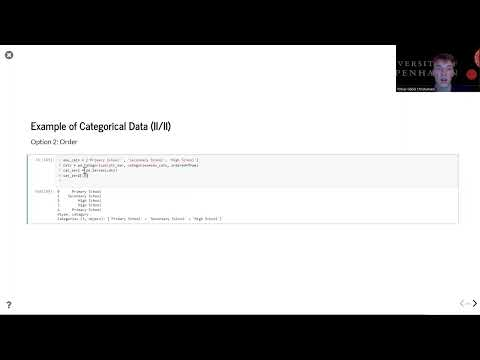

In [21]:
YouTubeVideo('rdvaomti5TM', width=640, height=360)

Having watched the video introducing categorical data, we now want you to try and work with it.

> **Ex. 2.3.2:** Do the following:
> 1. Convert the `area` column to a categorical variable. 
> 2. Transform the `obs_value` column from a continuous to a categorical variable by partitioning it into `3` intervals. The first interval should contain observations with values of `obs_value` up to the 10% quantile. The second interval should contain observations with values of `obs_value` up to the 90% quantile. The third interval should contain the rest of the observations. Call this new column for `obs_value_cat`.  This can be done using the `pd.qcut()` method.
> 3. Make another column with  `obs_value` as a categorical variable but this time label the 3 intervals as `["cold", "medium", "hot"]`. This can be done by specifying the `labels` parameter in the `pd.qcut()` method of pandas. Call this new column for `obs_value_cat_labeled`.

In [22]:
# INCLUDED IN ASSIGNMENT 1

# 1. Convert the 'area' column to a categorical variable
df_weather['area'] = df_weather['area'].astype('category')

# 2. Transform the 'obs_value' column into a categorical variable with 3 intervals
df_weather['obs_value_cat'] = pd.qcut(df_weather['obs_value'], q=[0,0.1,0.9,1], labels=False)

# 3. Make another column with 'obs_value' as a categorical variable labeled as "cold", "medium", "hot"
df_weather['obs_value_cat_labeled'] = pd.qcut(df_weather['obs_value'], q=[0, 0.1, 0.9, 1], labels=["cold", "medium", "hot"])

df_weather


,station,datetime,obs_type,obs_value,area,obs_value_cat,obs_value_cat_labeled
0,AGE00135039,18630102,TMAX,11.5,AG,1,medium
1,AGE00135039,18630103,TMAX,11.0,AG,1,medium
2,AGE00135039,18630105,TMAX,15.5,AG,1,medium
3,AGE00135039,18630106,TMAX,16.5,AG,1,medium
4,AGE00135039,18630107,TMAX,15.0,AG,1,medium
...,...,...,...,...,...,...,...
5505,USW00014838,18630727,TMAX,20.6,US,1,medium
5506,USW00014838,18630728,TMAX,19.9,US,1,medium
5507,USW00014838,18630729,TMAX,25.1,US,1,medium
5508,USW00014838,18630730,TMAX,29.4,US,2,hot


In [23]:
# INCLUDED IN ASSIGNMENT 1

## Time Series Data

Our coverage of basic Python did not include time. This is another elementary datatypes, that has its own native structure or maybe converted to an integer using a smart method. See more below.

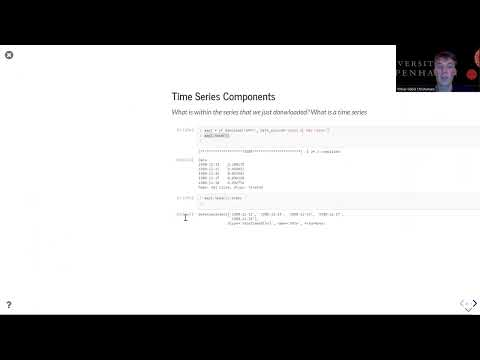

In [24]:
YouTubeVideo('wrLAYxAGZIY', width=640, height=360)

> **Ex. 2.3.3:** Convert the date formated as string to datetime. Call this column `datetime_dt`. Make a new column named `month` with the month for each observation. Set the datetime variable as temporal index. 
>
> *Hint:* Look up `.set_index()` setting the index.

In [25]:
# YOUR CODE HERE

#Convert the 'datetime' column from string to datetime format
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'], format='%Y%m%d')
df_weather.rename(columns={'datetime': 'datetime_dt'}, inplace=True) #rename column

# Create a new column 'month' with the month for each observation
df_weather['month'] = df_weather['datetime_dt'].dt.month

df_weather

# set datetime_dt as temporal index 
df_weather.set_index('datetime_dt', inplace=True)

df_weather


,station,obs_type,obs_value,area,obs_value_cat,obs_value_cat_labeled,month
datetime_dt,,,,,,,
1863-01-02,AGE00135039,TMAX,11.5,AG,1,medium,1
1863-01-03,AGE00135039,TMAX,11.0,AG,1,medium,1
1863-01-05,AGE00135039,TMAX,15.5,AG,1,medium,1
1863-01-06,AGE00135039,TMAX,16.5,AG,1,medium,1
1863-01-07,AGE00135039,TMAX,15.0,AG,1,medium,1
...,...,...,...,...,...,...,...
1863-07-27,USW00014838,TMAX,20.6,US,1,medium,7
1863-07-28,USW00014838,TMAX,19.9,US,1,medium,7
1863-07-29,USW00014838,TMAX,25.1,US,1,medium,7


> **Ex. 2.3.4:** Update your annotated function above with processing of area and temporal data.          

In [26]:
# INCLUDED IN ASSIGNMENT 1

In [27]:
# INCLUDED IN ASSIGNMENT 1# YOUR CODE HERE

def load_weather_new(year):
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    df_out = pd.read_csv(url, header=None)\
        .iloc[:, :4]\
        .rename(columns={0: 'station', 1: 'datetime', 2: 'obs_type', 3: 'obs_value'})\
        .assign(obs_value=lambda x: x['obs_value'] / 10)\
        .query("obs_type == 'TMAX'")\
        .sort_values(by=['station', 'datetime'])\
        .reset_index(drop=True)\
        .assign(area=lambda x: x['station'].str[:2])\
        .assign(obs_value_cat=lambda x: pd.qcut(x['obs_value'], q=[0, 0.1, 0.9, 1], labels=False))\
        .assign(obs_value_cat_labeled=lambda x: pd.qcut(x['obs_value'], q=[0, 0.1, 0.9, 1], labels=["cold", "medium", "hot"]))\
        .assign(datetime_dt=lambda x: pd.to_datetime(x['datetime'], format='%Y%m%d'))\
        .assign(month=lambda x: x['datetime_dt'].dt.month)\
        .set_index('datetime_dt')
    
    return df_out

# Test the function for the year 1863
result_df = load_weather_new(1863)
result_df


,station,datetime,obs_type,obs_value,area,obs_value_cat,obs_value_cat_labeled,month
datetime_dt,,,,,,,,
1863-01-02,AGE00135039,18630102,TMAX,11.5,AG,1,medium,1
1863-01-03,AGE00135039,18630103,TMAX,11.0,AG,1,medium,1
1863-01-05,AGE00135039,18630105,TMAX,15.5,AG,1,medium,1
1863-01-06,AGE00135039,18630106,TMAX,16.5,AG,1,medium,1
1863-01-07,AGE00135039,18630107,TMAX,15.0,AG,1,medium,1
...,...,...,...,...,...,...,...,...
1863-07-27,USW00014838,18630727,TMAX,20.6,US,1,medium,7
1863-07-28,USW00014838,18630728,TMAX,19.9,US,1,medium,7
1863-07-29,USW00014838,18630729,TMAX,25.1,US,1,medium,7


> **Ex. 2.3.5:** Make a timeseries plot for the station called `AGE00135039`.
>
> _Hint:_ for this you need to know a few methods of the pandas Series objects, for instance `.plot()`. 

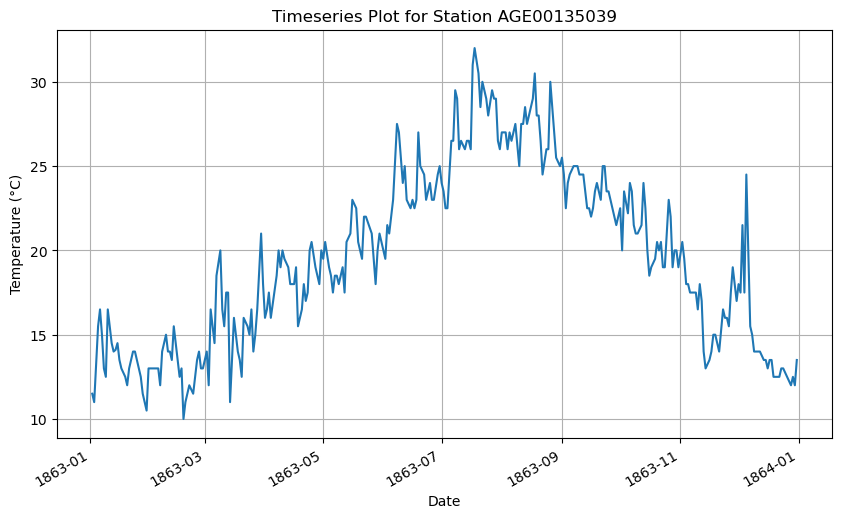

In [28]:
# YOUR CODE HERE

# Extract data for the station 'AGE00135039'
station_data = result_df[result_df['station'] == 'AGE00135039']

# Make a timeseries plot
plt.figure(figsize=(10, 6))
station_data['obs_value'].plot()
plt.title('Timeseries Plot for Station AGE00135039')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()